<a href="https://colab.research.google.com/github/sanskarahamana/APS-LAB/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

--- Sample Input Test ---
Original Sample Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sorted Sample Output:  [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]


--- Running Time Measurement ---
Input Size: 100, Running Time: 0.000317 seconds
Input Size: 500, Running Time: 0.000374 seconds
Input Size: 1000, Running Time: 0.000449 seconds
Input Size: 2000, Running Time: 0.001193 seconds
Input Size: 5000, Running Time: 0.000949 seconds
Input Size: 10000, Running Time: 0.001459 seconds
Input Size: 20000, Running Time: 0.002561 seconds
Input Size: 50000, Running Time: 0.006340 seconds


--- Plotting Running Time ---


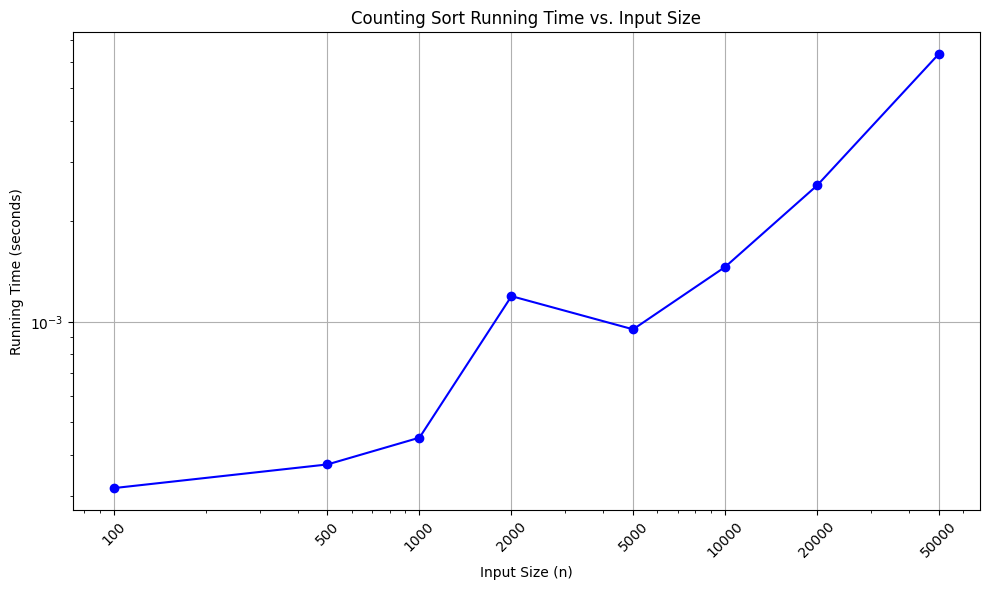

In [8]:
import time
import random
import matplotlib.pyplot as plt

def counting_sort(arr):
    """
    Implements the Counting Sort algorithm.
    Assumes input elements are non-negative integers.
    """
    if not arr:
        return []
    k = max(arr)
    count = [0] * (k + 1)

    for num in arr:
        count[num] += 1

    sorted_arr = []
    for i in range(k + 1):
        sorted_arr.extend([i] * count[i])

    return sorted_arr
print("--- Sample Input Test ---")
sample_input = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
print(f"Original Sample Input: {sample_input}")
sorted_sample = counting_sort(sample_input)
print(f"Sorted Sample Output:  {sorted_sample}")
print("\n")

print("--- Running Time Measurement ---")
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
running_times = []
max_value_k = 1000

for size in input_sizes:
    random_list = [random.randint(0, max_value_k) for _ in range(size)]

    start_time = time.time()
    counting_sort(random_list)
    end_time = time.time()

    elapsed_time = end_time - start_time
    running_times.append(elapsed_time)
    print(f"Input Size: {size}, Running Time: {elapsed_time:.6f} seconds")

print("\n")
print("--- Plotting Running Time ---")
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, running_times, marker='o', linestyle='-', color='b')
plt.title('Counting Sort Running Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(input_sizes, labels=[str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()


In [9]:
#write code for above cell and compute the running time and also plot graph.

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


In [10]:
import time
import random
import matplotlib.pyplot as plt

def bucket_sort(arr):
    if not arr:
        return []


    min_val = min(arr)
    max_val = max(arr)


    if min_val == max_val:
        return arr


    num_buckets = 10
    if len(arr) > 20:
        num_buckets = int(len(arr)**0.5)


    if num_buckets == 0:
        num_buckets = 1

    buckets = [[] for _ in range(num_buckets)]

    range_of_values = max_val - min_val
    if range_of_values == 0:

        return arr

    for num in arr:

        bucket_index = int((num - min_val) * num_buckets / (range_of_values + 1))
        buckets[bucket_index].append(num)


    sorted_arr = []
    for bucket in buckets:

        sorted_arr.extend(sorted(bucket))

    return sorted_arr
print("--- Sample Input Test ---")
sample_input = [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
print(f"Original Sample Input: {sample_input}")
sorted_sample = bucket_sort(sample_input)
print(f"Sorted Sample Output:  {sorted_sample}")
print("\n")


--- Sample Input Test ---
Original Sample Input: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sorted Sample Output:  [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]




--- Running Time Measurement ---
Input Size: 100, Running Time: 0.000094 seconds
Input Size: 500, Running Time: 0.000296 seconds
Input Size: 1000, Running Time: 0.000540 seconds
Input Size: 2000, Running Time: 0.001446 seconds
Input Size: 5000, Running Time: 0.003535 seconds
Input Size: 10000, Running Time: 0.005656 seconds
Input Size: 20000, Running Time: 0.011010 seconds
Input Size: 50000, Running Time: 0.045317 seconds


--- Plotting Running Time ---


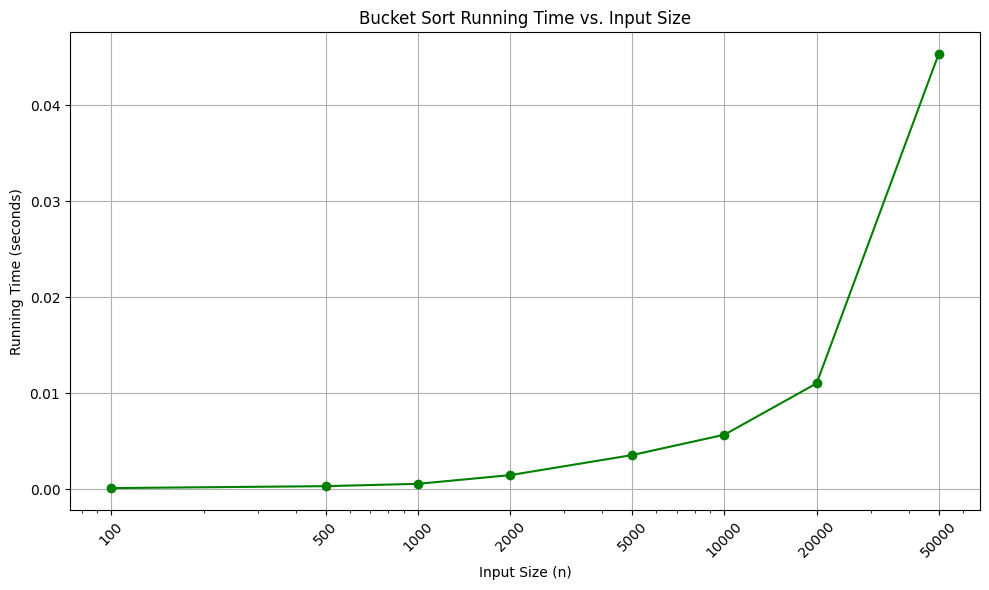

In [11]:

print("--- Running Time Measurement ---")
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
running_times = []

max_value_range = 1000

for size in input_sizes:

    random_list = [random.randint(0, max_value_range) for _ in range(size)]

    start_time = time.time()
    bucket_sort(random_list)
    end_time = time.time()

    elapsed_time = end_time - start_time
    running_times.append(elapsed_time)
    print(f"Input Size: {size}, Running Time: {elapsed_time:.6f} seconds")

print("\n")

print("--- Plotting Running Time ---")
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, running_times, marker='o', linestyle='-', color='g')
plt.title('Bucket Sort Running Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.xticks(input_sizes, labels=[str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

In [12]:
import time
import random
import matplotlib.pyplot as plt

def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1
    for i in range(1, 10):
        count[i] += count[i - 1]
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if not arr:
        return []
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10
    return arr
print("--- Sample Input Test ---")
sample_input = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
print(f"Original Sample Input: {sample_input}")
sorted_sample = radix_sort(sample_input.copy())
print(f"Sorted Sample Output:  {sorted_sample}")
print("\n")


--- Sample Input Test ---
Original Sample Input: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sorted Sample Output:  [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]




--- Running Time Measurement ---
Input Size: 100, Running Time: 0.000134 seconds
Input Size: 500, Running Time: 0.000631 seconds
Input Size: 1000, Running Time: 0.001610 seconds
Input Size: 2000, Running Time: 0.003515 seconds
Input Size: 5000, Running Time: 0.008020 seconds
Input Size: 10000, Running Time: 0.021472 seconds
Input Size: 20000, Running Time: 0.034889 seconds
Input Size: 50000, Running Time: 0.126213 seconds


--- Plotting Running Time ---


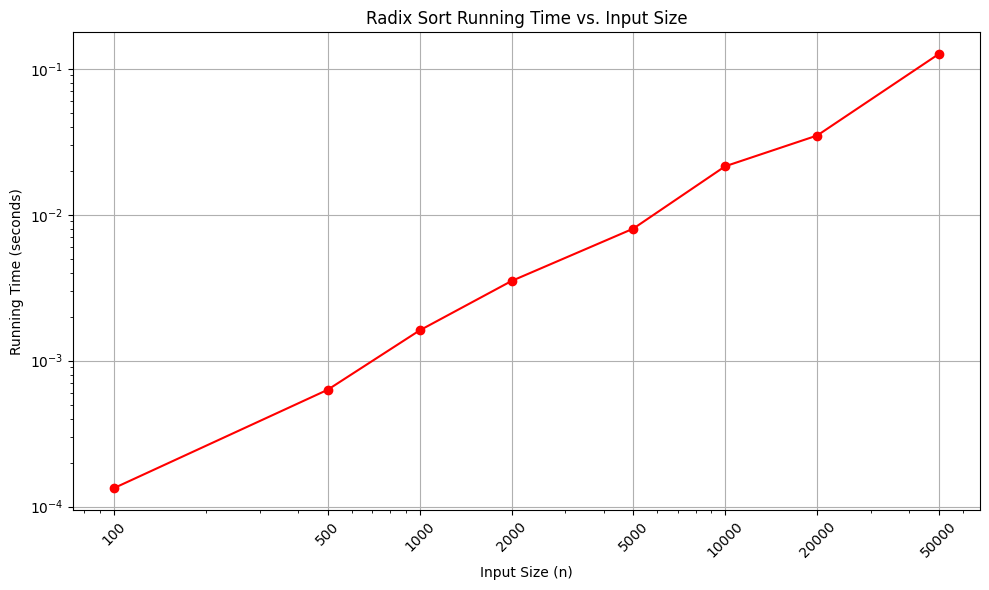

In [13]:
print("--- Running Time Measurement ---")
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
running_times = []
max_value_for_radix = 10000

for size in input_sizes:
    random_list = [random.randint(0, max_value_for_radix) for _ in range(size)]

    start_time = time.time()
    radix_sort(random_list.copy())
    end_time = time.time()

    elapsed_time = end_time - start_time
    running_times.append(elapsed_time)
    print(f"Input Size: {size}, Running Time: {elapsed_time:.6f} seconds")

print("\n")

print("--- Plotting Running Time ---")
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, running_times, marker='o', linestyle='-', color='r')
plt.title('Radix Sort Running Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (seconds)')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xticks(input_sizes, labels=[str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()